In [ ]:
! pip install pymorphy2

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 8.2MB 9.7MB/s 


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

from collections import Counter
import collections

import nltk
nltk.download('punkt')

from tqdm import tqdm

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def pos_frequency(file):
    with open(file, 'r', encoding='utf-8') as t:
        text = t.read()
        tokens = word_tokenize(text)
        words = [w for w in tokens if w.isalpha()]

        lemmas = []

        for i in tqdm(words):
            analise = morph.parse(i)
            lemmas.append(analise)
            
        forms_from_text = []
        for lemma in lemmas:
            one = lemma[0]
            form = [one.normal_form, one.tag.POS]
            forms_from_text.append(form)

        pos = []
        freq = []

        counter_of_forms = collections.Counter()
        allf = 0
        for i in forms_from_text:
            allf = allf + 1
            form = i[1]
            counter_of_forms[form] += 1

        return counter_of_forms

In [ ]:
a_Litvinovy = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/author_Litvinovy')

100%|██████████| 2459154/2459154 [11:23<00:00, 3600.13it/s]


In [ ]:
a_Marinina = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/author_Marinina')
a_Polyakova = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/author_Polyakova')
a_Ustinova = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/author_Ustinova')

100%|██████████| 2183784/2183784 [09:47<00:00, 3720.13it/s]


In [ ]:
d_Litvinovy = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/dialog_Litvinovy')
d_Marinina = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/dialog_Marinina')
d_Ustinova = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/dialog_Ustinova')
d_Polyakova = pos_frequency('/content/drive/MyDrive/Colab Notebooks/Курсовая/dialog_Polyakova')

100%|██████████| 1530105/1530105 [06:13<00:00, 4094.43it/s]


In [ ]:
df_aL = pd.DataFrame(a_Litvinovy.values(), a_Litvinovy.keys())
print('Литвиновы: авторская речь')
df_aL.to_csv('Litvinovy_author.csv')
df_aL

Литвиновы: авторская речь


,0
NOUN,671993
PREP,281985
ADJF,266300
VERB,339921
PRCL,132602
NPRO,160879
CONJ,254673
ADVB,184629
INFN,69072
PRTF,20878


In [ ]:
df_dL = pd.DataFrame(d_Litvinovy.values(), d_Litvinovy.keys())
print('Литвиновы: прямая речь')
df_dL.to_csv('Litvinovy_dialog.csv')
df_dL

Литвиновы: прямая речь


,0
NOUN,233123
ADJF,85451
VERB,167322
NPRO,116065
ADVB,79131
PRCL,74402
ADJS,8186
PREP,95340
CONJ,104504
INFN,29036


In [ ]:
df_aM = pd.DataFrame(a_Marinina.values(), a_Marinina.keys())
print('Маринина: авторская речь')
df_aM.to_csv('Marinina_author.csv')
df_aM

Маринина: авторская речь


,0
NOUN,777054
CONJ,361895
PREP,329526
ADJF,317092
NPRO,246124
ADVB,233016
INFN,118962
VERB,413155
PRTF,26996
PRCL,204313


In [ ]:
df_dM = pd.DataFrame(d_Marinina.values(), d_Marinina.keys())
print('Маринина: прямая речь')
df_dM.to_csv('Marinina_dialog.csv')
df_dM

Маринина: прямая речь


,0
ADVB,119863
NOUN,322226
VERB,239992
PREP,141774
NPRO,190312
GRND,5490
PRTF,4858
ADJF,131785
CONJ,182670
INFN,61048


In [ ]:
df_aU = pd.DataFrame(a_Ustinova.values(), a_Ustinova.keys())
print('Устинова: авторская речь')
df_aU.to_csv('Ustinova_author.csv')
df_aU

Устинова: авторская речь


,0
NOUN,530622
ADJF,203561
VERB,330370
NPRO,185444
INFN,64439
CONJ,253970
PRCL,133321
PREP,223633
ADVB,170121
ADJS,15495


In [ ]:
df_dU = pd.DataFrame(d_Ustinova.values(), d_Ustinova.keys())
print('Устинова: прямая речь')
df_dU.to_csv('Ustinova_dialog.csv')
df_dU

Устинова: прямая речь


,0
INFN,29823
PRCL,84937
VERB,177727
ADVB,82406
PREP,89626
NPRO,134789
NOUN,224332
ADJF,72053
PRED,10254
NUMR,4425


In [ ]:
df_aP = pd.DataFrame(a_Polyakova.values(), a_Polyakova.keys())
print('Полякова: авторская речь')
df_aP.to_csv('Polyakova_author.csv')
df_aP

Полякова: авторская речь


,0
PREP,348545
NOUN,719954
ADJF,238102
VERB,533880
NPRO,361207
CONJ,334230
PRCL,183587
PRTF,13131
ADVB,237877
ADJS,22115


In [ ]:
df_dP = pd.DataFrame(d_Polyakova.values(), d_Polyakova.keys())
print('Полякова: прямая речь')
df_dP.to_csv('Polyakova_dialog.csv')
df_dP

Полякова: прямая речь


,0
ADVB,111706
NPRO,208348
NOUN,306637
VERB,269939
CONJ,158501
PREP,145857
GRND,13274
ADJF,104267
ADJS,13099
INFN,53196


In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [57]:
Litvinovy_author = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Litvinovy_author.csv'))
Litvinovy_dialog = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Litvinovy_dialog.csv'))
Marinina_author = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Marinina_author.csv'))
Marinina_dialog = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Marinina_dialog.csv'))
Polyakova_author = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Polyakova_author.csv'))
Polyakova_dialog = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Polyakova_dialog.csv'))
Ustinova_author = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Ustinova_author.csv'))
Ustinova_dialog = df_sort(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Курсовая/Ustinova_dialog.csv'))

In [55]:
def df_sort(df):
    return df.sort_values(by=['pos'])

In [49]:
def graphic(df, name):

    pos = df['pos']

    frequency_of_pos = df['freq']

    plt.bar(pos, frequency_of_pos, color=['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42',
                                        '#FFB5B8', '#003FFF', '#03ED3A', '#E8000B', '#8A2BE2', '#FFC400',
                                        '#00D7FF', '#348ABD', '#A60628', '#7A68A6', '#467821'])
    plt.xticks(rotation='vertical')
    plt.title(name)
    plt.ylabel('Частотность')
    plt.xlabel('Части речи')

In [68]:
print('Обозначения частей речи в pymorphy2:')
print('''NOUN - имя существительное,
ADJF - имя прилагательное (полное),
ADJS - имя прилагательное (краткое),
COMP - компаратив, 
VERB - глагол (личная форма),
INFN - глагол (инфинитив),
PRTF - причастие (полное), 
PRTS - причастие (краткое)
GRND - деепричастие,
NUMR - числительное,
ADVB - наречие,
NPRO - местоимение-существительное,
PRED - предикатив,
PREP - предлог,
CONJ - союз,
PRCL - частица,
INTJ - междометие''')

Обозначения частей речи в pymorphy2:
NOUN - имя существительное,
ADJF - имя прилагательное (полное),
ADJS - имя прилагательное (краткое),
COMP - компаратив, 
VERB - глагол (личная форма),
INFN - глагол (инфинитив),
PRTF - причастие (полное), 
PRTS - причастие (краткое)
GRND - деепричастие,
NUMR - числительное,
ADVB - наречие,
NPRO - местоимение-существительное,
PRED - предикатив,
PREP - предлог,
CONJ - союз,
PRCL - частица,
INTJ - междометие


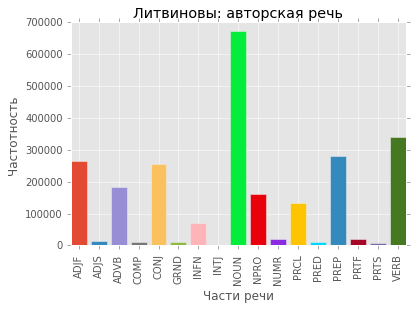

In [58]:
graphic(Litvinovy_author, 'Литвиновы: авторская речь')

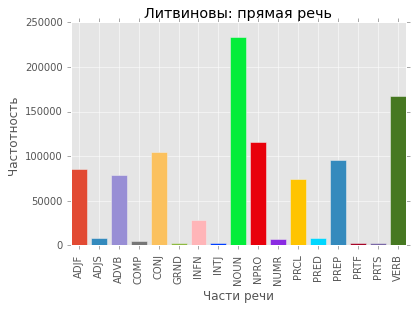

In [59]:
graphic(Litvinovy_dialog, 'Литвиновы: прямая речь')

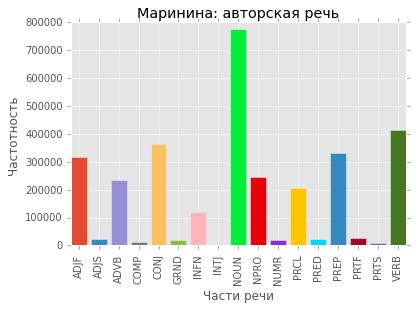

In [61]:
graphic(Marinina_author, 'Маринина: авторская речь')

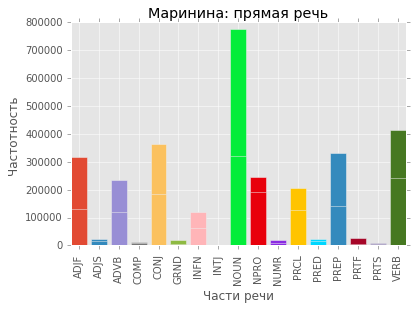

In [60]:
graphic(Marinina_dialog, 'Маринина: прямая речь')

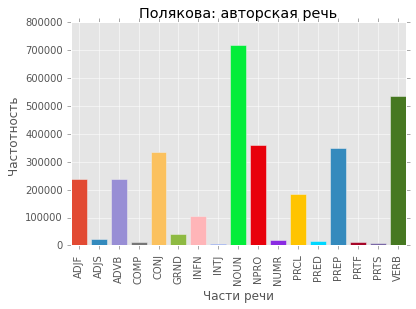

In [62]:
graphic(Polyakova_author, 'Полякова: авторская речь')

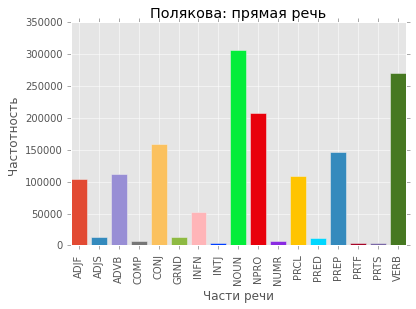

In [63]:
graphic(Polyakova_dialog, 'Полякова: прямая речь')

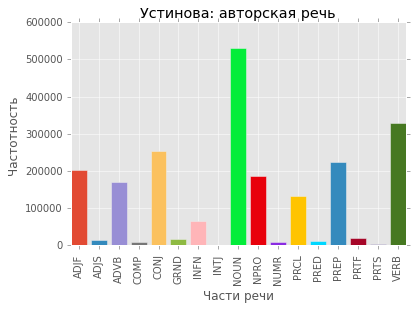

In [64]:
graphic(Ustinova_author, 'Устинова: авторская речь')

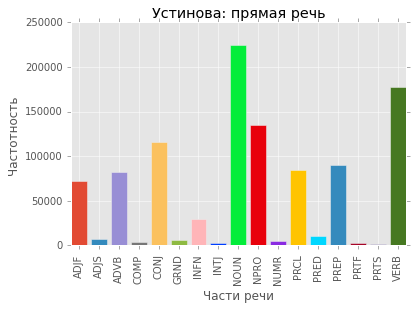

In [65]:
graphic(Ustinova_dialog, 'Устинова: прямая речь')